# Brooke Hunter lab 5 submission

## Lab 5: Machine learning in Python

**Objectives:**
   * Engineer some features for better prediction of Seattle house prices 
   * Train a machine learning model using <code>scikit-learn</code>
   * Evaluate our machine learning model

***********
## Question 1 (10 points): 

To start, make a **new** `jupyter notebook` called `lab5_submission.ipynb` and work through the following tasks. 

The first task is answer the following questions using some of the methods we have covered in the lecture/demo. 

***********

In [1]:
# Import libraries
import pandas as pd
from shapely.geometry import Point
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/seattle_house_prices.csv')

# Read dataset
coast = gpd.read_file('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/Washington_coastline.shp')

In [3]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

* How many houses are in this dataset?

In [4]:
num_rows = df.shape[0]
print('The number of houses in the data set is equal to the number of rows, so there are %i houses in this dataset' % (num_rows))

The number of houses in the data set is equal to the number of rows, so there are 19451 houses in this dataset


* How many **features** are there for predicting house price? 

In [5]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319,POINT (-122.31900 47.72100)
1,180000,2,1.00,770,10000,1933,47.7379,-122.233,POINT (-122.23300 47.73790)
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393,POINT (-122.39300 47.52080)
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045,POINT (-122.04500 47.61680)
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005,POINT (-122.00500 47.65610)
...,...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409,POINT (-122.40900 47.57730)
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346,POINT (-122.34600 47.69930)
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362,POINT (-122.36200 47.51070)
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069,POINT (-122.06900 47.53450)


In [6]:
num_features = df.shape[1] - 2
print('The number of features in the data set for predicting house price is equal to the number of columns (minus 2 for the price and geometry), so there are %i features in this dataset to predict house price' % (num_features))

The number of features in the data set for predicting house price is equal to the number of columns (minus 2 for the price and geometry), so there are 7 features in this dataset to predict house price


* Are there any null values in this dataset?

There are **no** null values in this dataset.

In [7]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
geometry       0
dtype: int64

### Correlation matrix
Correlation matrix to find the best predictors of house price of `median_house_value`.

In [8]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price          1.000000
sqft_living    0.702296
bathrooms      0.524395
bedrooms       0.315804
lat            0.308082
sqft_lot       0.090125
yr_built       0.052453
long           0.020092
Name: price, dtype: float64

* Which three variables are best correlated with house price (include correlation coefficients)?

**Best correlated** three 

* sqft_living: 0.702296
* bathrooms:    0.524395
* bedrooms:  0.315804

* Which three variables are least correlated with house price (include correlation coefficients)?

**Least correlated** three 

* sqft_lot:  0.090125
* yr_built: 0.052453
* long: 0.020092

# Base Model (no changes from example)

In [9]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'lat', 'long']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Split data 
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model
forest_reg_orig = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_orig.fit(X_train_orig, y_train_orig)


# Predict test labels predictions
predictions_orig = forest_reg_orig.predict(X_test_orig)

# Compute mean-squared-error
final_mse_orig = mean_squared_error(y_test_orig, predictions_orig)
final_rmse_orig = np.sqrt(final_mse_orig)
final_rmse_orig

154820.45890147457

(0.0, 500000.0)

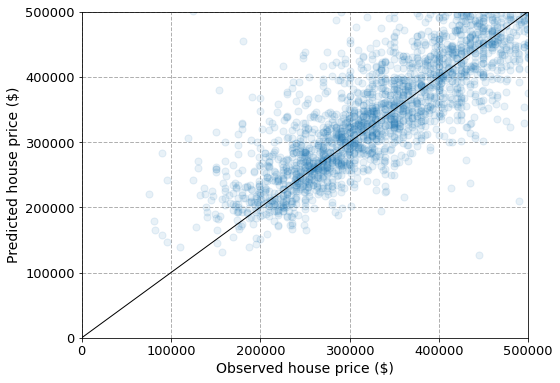

In [10]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test_orig, predictions_orig, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

*******

## Question 2 (30 points):

*******

* Produce a model to predict house prices. You are welcome to generate new features, scale the data, and split the data into training/testing (i.e. `train_test_split`) in any way you like. 

# Model updates 
## I added the following features/predictors
* Distance to coastline
* Distance to Amazon Headquarters
* Distance to Microsoft Headquarters
* Distance to Nisqually entrance
* Distance to Bainbridge island Headquarters
* Distance to Capitol hill neighborhood
* Bedrooms per square foot variable

## Changes to model parameters and test/train size
* num estimators in random forest regressor increased to 200
* increased test data to 0.25

In [11]:
# add sqft living per bedroom
gdf_utm['sqft_liv_bedroom'] = gdf_utm['bedrooms']/gdf_utm['sqft_living']

In [12]:
#compute distances to coast, amazon and microsfot headquarters
amHQ = Point(-122.337198,47.621476) #amazon headquarters
msHQ = Point(-122.192524,47.614082) #microsoft headquarters
caphill = Point(-122.314921,47.626536) #capitol hill
Nisq_ent = Point(-121.917050,46.740912) # Nisqually entrance to Mt Rainer National Park
Bain_cent = Point(-122.533874, 47.643539) #Bainbridge island center

msHQ_gdf = gpd.GeoDataFrame(geometry = [msHQ])
msHQ_gdf = msHQ_gdf.set_crs(4326)
msHQ_gdf = msHQ_gdf.to_crs(32610)

amHQ_gdf = gpd.GeoDataFrame(geometry = [amHQ])
amHQ_gdf = amHQ_gdf.set_crs(4326)
amHQ_gdf = amHQ_gdf.to_crs(32610)

caphill_gdf = gpd.GeoDataFrame(geometry = [caphill])
caphill_gdf = caphill_gdf.set_crs(4326)
caphill_gdf = caphill_gdf.to_crs(32610)

Nisq_ent_gdf = gpd.GeoDataFrame(geometry = [Nisq_ent])
Nisq_ent_gdf = Nisq_ent_gdf.set_crs(4326)
Nisq_ent_gdf = Nisq_ent_gdf.to_crs(32610)

Bain_gdf = gpd.GeoDataFrame(geometry = [Bain_cent])
Bain_gdf = Bain_gdf.set_crs(4326)
Bain_gdf = Bain_gdf.to_crs(32610)

distance_to_amHQ = []
distance_to_msHQ = []
distance_to_coast = []
distance_to_caphill = []
distance_to_Nisq_ent = []
distance_to_Bain_cent = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())  # Compute distance to coast for Seattle housing
    distance_to_amHQ.append(amHQ_gdf.distance(gdf_utm['geometry'].iloc[i])[0]) # Compute distance to amazon headquarters for Seattle housing
    distance_to_msHQ.append(amHQ_gdf.distance(gdf_utm['geometry'].iloc[i])[0])  # Compute distance to microsoft headquarters for Seattle housing
    distance_to_caphill.append(caphill_gdf.distance(gdf_utm['geometry'].iloc[i])[0])  # Compute distance to capitol hill for Seattle housing
    distance_to_Nisq_ent.append(Nisq_ent_gdf.distance(gdf_utm['geometry'].iloc[i])[0]) # Distance to Nisqually entrance for Mt Rainer National Park
    distance_to_Bain_cent.append(Bain_gdf.distance(gdf_utm['geometry'].iloc[i])[0]) # Distance to Bainbrdige island center
# Add to DataFrame
gdf_utm['distance_to_amHQ'] = distance_to_amHQ
gdf_utm['distance_to_msHQ'] = distance_to_msHQ
gdf_utm['distance_to_coast'] = distance_to_coast
gdf_utm['distance_to_caphill'] = distance_to_caphill
gdf_utm['distance_to_Nisqually'] = distance_to_Nisq_ent
gdf_utm['distance_to_Bainbridge'] = distance_to_Bain_cent

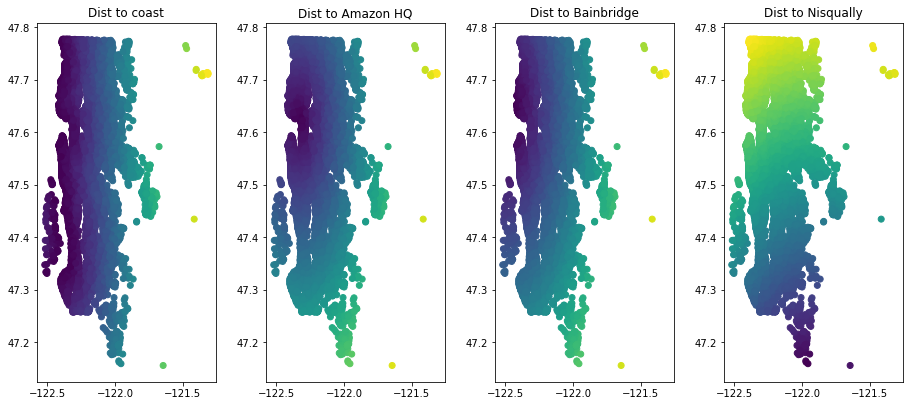

In [13]:
# Plot of distance to coastline for seattle
fig, ax = plt.subplots(nrows = 1, ncols = 4,figsize=(13, 6))
ax[0].scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_coast'])
ax[0].title.set_text('Dist to coast')

ax[1].scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_amHQ'])
ax[1].title.set_text('Dist to Amazon HQ')

ax[2].scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_Bainbridge'])
ax[2].title.set_text('Dist to Bainbridge')

ax[3].scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_Nisqually'])
ax[3].title.set_text('Dist to Nisqually')


fig.tight_layout(pad = 2.0)



## Confusion matrix 

In [14]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                     1.000000
sqft_living               0.702296
bathrooms                 0.524395
bedrooms                  0.315804
lat                       0.308082
distance_to_Nisqually     0.291833
sqft_lot                  0.090125
yr_built                  0.052453
distance_to_coast         0.027830
long                      0.020092
distance_to_Bainbridge   -0.203638
distance_to_amHQ         -0.302925
distance_to_msHQ         -0.302925
distance_to_caphill      -0.327569
sqft_liv_bedroom         -0.479228
Name: price, dtype: float64

## Fit a model

In [20]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'distance_to_coast',
                 'distance_to_amHQ','distance_to_msHQ', 'lat', 'long', 'sqft_liv_bedroom',
                'distance_to_Bainbridge','distance_to_caphill','distance_to_Nisqually']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [21]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [22]:
# Define model
forest_reg_n200 = RandomForestRegressor(n_estimators = 200)

# Fit model
forest_reg_n200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

## Evaluate model

In [23]:
# Predict test labels predictions
predictions_200 = forest_reg_n200.predict(X_test)

# Compute mean-squared-error
final_mse_200 = mean_squared_error(y_test , predictions_200)
final_rmse_200 = np.sqrt(final_mse_200)
final_rmse_200


150389.90455120505

# Compare base and new model

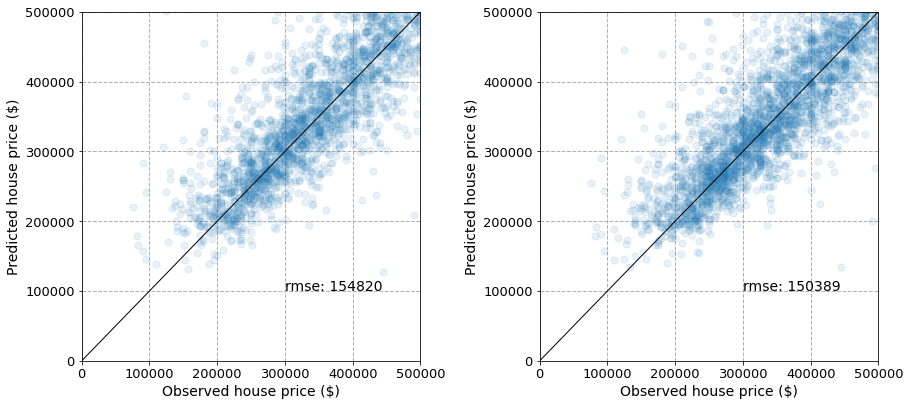

In [24]:
# Plot
fig, ax = plt.subplots(1,2,figsize=(13, 6))
ax[0].scatter(y_test_orig, predictions_orig, alpha=0.1, s=50, zorder=2)
ax[0].plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax[0].set_ylabel('Predicted house price ($)', fontsize=14)
ax[0].set_xlabel('Observed house price ($)', fontsize=14)
ax[0].tick_params(axis='both', which='major', labelsize=13)
ax[0].grid(ls='dashed', lw=1, zorder=1)
ax[0].set_ylim(0,500000)
ax[0].set_xlim(0,500000)
ax[0].text(300000, 100000, 'rmse: ' + str(int(final_rmse_orig)), fontsize = 14)

ax[1].scatter(y_test, predictions_200, alpha=0.1, s=50, zorder=2)
ax[1].plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax[1].set_ylabel('Predicted house price ($)', fontsize=14)
ax[1].set_xlabel('Observed house price ($)', fontsize=14)
ax[1].tick_params(axis='both', which='major', labelsize=13)
ax[1].grid(ls='dashed', lw=1, zorder=1)
ax[1].set_ylim(0,500000)
ax[1].set_xlim(0,500000)
ax[1].text(300000, 100000, 'rmse: ' + str(int(final_rmse_200)), fontsize = 14)

fig.tight_layout(pad = 2.0)